In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#load the data
from statsmodels.tsa.arima_model import ARMA
data=pd.read_csv("/content/Sales.csv")
data.head()

<ipython-input-2-8edee73a383c>:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/Sales.csv")


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Unnamed: 18
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,#NAME?
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,NaN
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,NaN
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,NaN
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,NaN


In [3]:
# Check the column names
print("Original columns:", data.columns)

# Drop the 'Unnamed' column
if 'Unnamed: 18' in data.columns:
    data.drop(columns=['Unnamed: 18'], inplace=True)

# Check the column names after dropping
print("Columns after dropping 'Unnamed':", data.columns)
data.head()

Original columns: Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Unnamed: 18'],
      dtype='object')
Columns after dropping 'Unnamed': Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
#Data Cleaning
infy_data=data.dropna()
infy_data.index=pd.to_datetime(infy_data.Date)

infy_data.describe()

<ipython-input-4-65c730e570a7>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  infy_data.index=pd.to_datetime(infy_data.Date)


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


<ipython-input-5-4996231cd713>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


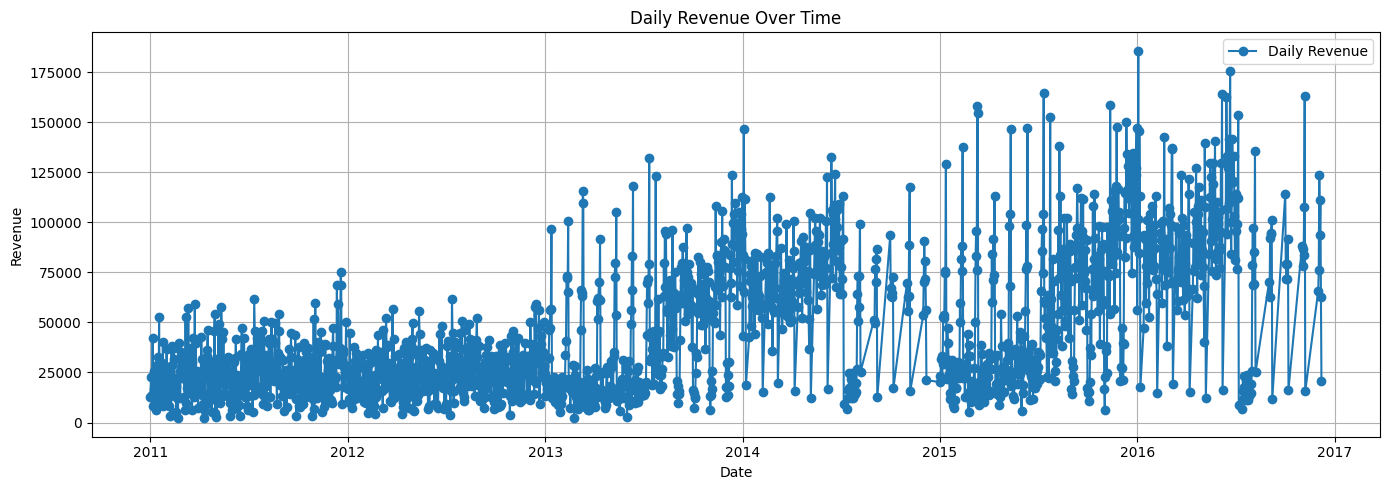

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

# Group by date and sum the revenue
daily_revenue = data.groupby('Date')['Revenue'].sum()

# Plot the time series data
plt.figure(figsize=(14, 5))
plt.plot(daily_revenue, label='Daily Revenue', marker='o', linestyle='-')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Group by month and sum the sales
monthly_sales = data.resample('M').sum()

<ipython-input-6-9950bccaec0f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = data.resample('M').sum()


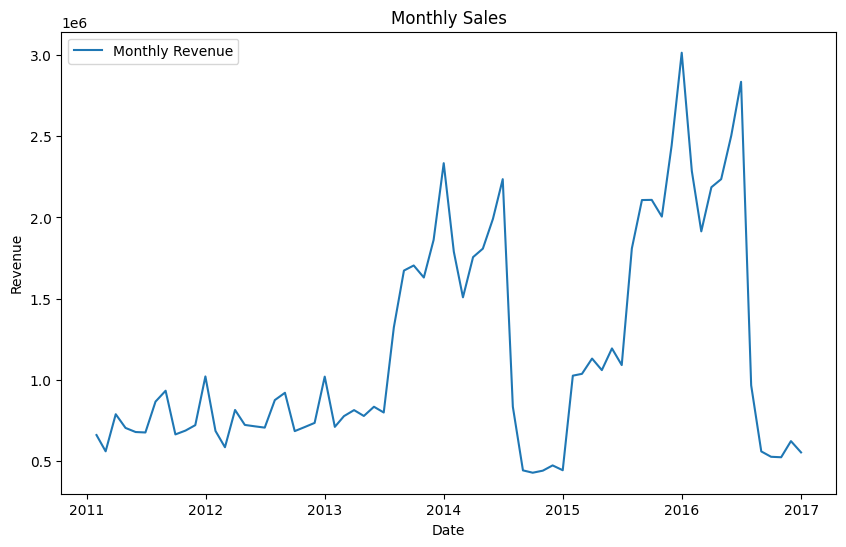

In [7]:
# Plot the monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Revenue'], label='Monthly Revenue')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [8]:
# Fit ARIMA model
model = ARIMA(monthly_sales['Revenue'], order=(5,1,0))  # ARIMA(p,d,q) where p=AR order, d=differencing, q=MA order
result = model.fit()

# Summary of the model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   72
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1010.984
Date:                Sat, 23 Mar 2024   AIC                           2033.968
Time:                        09:52:28   BIC                           2047.545
Sample:                    01-31-2011   HQIC                          2039.367
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0432      0.148      0.292      0.770      -0.247       0.333
ar.L2         -0.1905      0.154     -1.239      0.215      -0.492       0.111
ar.L3          0.0041      0.407      0.010      0.9

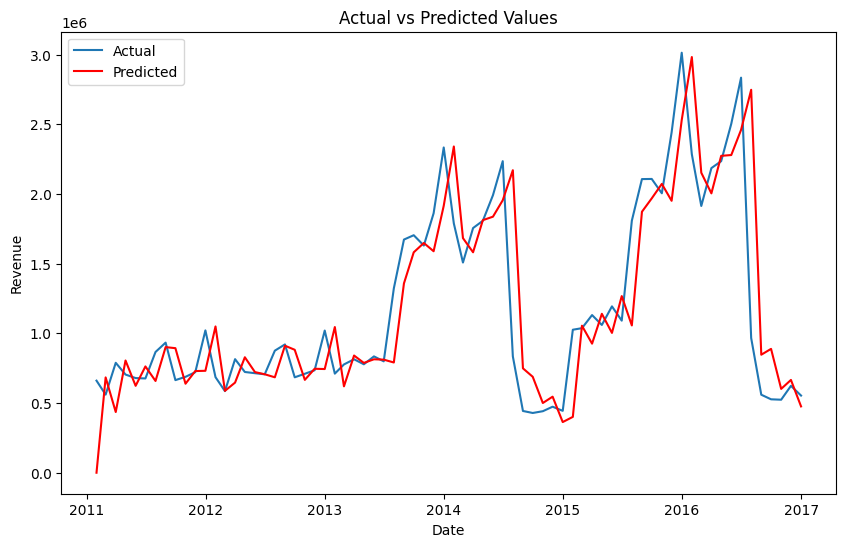

In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Revenue'], label='Actual')
plt.plot(result.fittedvalues, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [10]:
#taking results back to original scale
ARIMA_diff_predictions=pd.Series(result.fittedvalues,copy=True)
ARIMA_diff_predictions.head()

Date
2011-01-31         0.000000
2011-02-28    684037.575535
2011-03-31    435524.851231
2011-04-30    805303.016953
2011-05-31    623561.746648
Freq: M, dtype: float64

In [11]:
#cumulative sum
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
ARIMA_diff_predictions_cumsum.head()

Date
2011-01-31    0.000000e+00
2011-02-28    6.840376e+05
2011-03-31    1.119562e+06
2011-04-30    1.924865e+06
2011-05-31    2.548427e+06
Freq: M, dtype: float64

In [12]:
result.predict(10,30)

Date
2011-11-30    7.295107e+05
2011-12-31    7.313575e+05
2012-01-31    1.049654e+06
2012-02-29    5.875631e+05
2012-03-31    6.467078e+05
2012-04-30    8.285418e+05
2012-05-31    7.220455e+05
2012-06-30    7.064141e+05
2012-07-31    6.847492e+05
2012-08-31    9.113695e+05
2012-09-30    8.821054e+05
2012-10-31    6.663071e+05
2012-11-30    7.458551e+05
2012-12-31    7.439728e+05
2013-01-31    1.045405e+06
2013-02-28    6.198189e+05
2013-03-31    8.408714e+05
2013-04-30    7.879284e+05
2013-05-31    8.140131e+05
2013-06-30    8.114187e+05
2013-07-31    7.909496e+05
Freq: M, Name: predicted_mean, dtype: float64

<ipython-input-15-354348854d67>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Sales.csv")
<ipython-input-15-354348854d67>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = data.resample('M').sum()


Root Mean Squared Error (RMSE): 1795459.4268938124


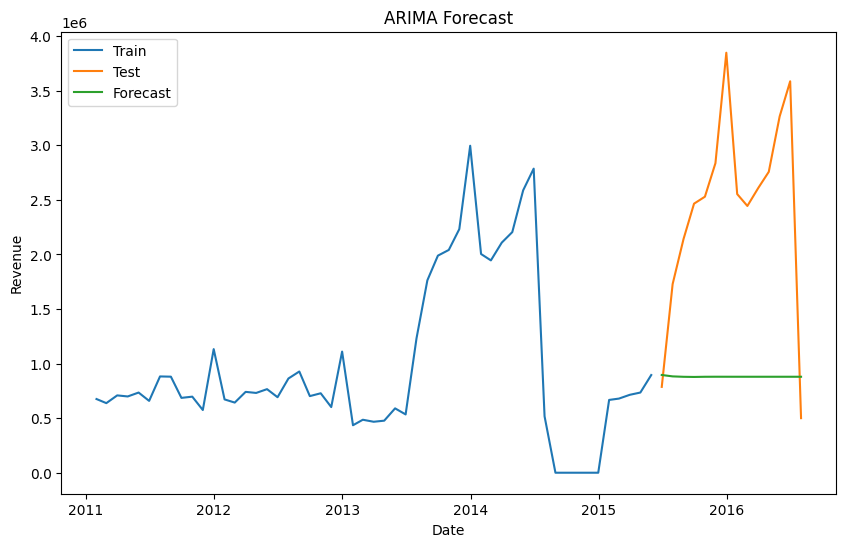

In [15]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Aggregate the data if needed (e.g., if you want to forecast monthly)
# Here we'll sum the data by month
monthly_data = data.resample('M').sum()

# Split the data into training and testing sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Fit ARIMA model
model = ARIMA(train['Revenue'], order=(5,1,0))  # Example order, you may need to tune this
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test))

# Evaluate the model
mse = np.mean((forecast - test['Revenue'])**2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Revenue'], label='Train')
plt.plot(test.index, test['Revenue'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


<ipython-input-16-704de47adc6b>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Sales.csv")
<ipython-input-16-704de47adc6b>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = data.resample('M').sum()


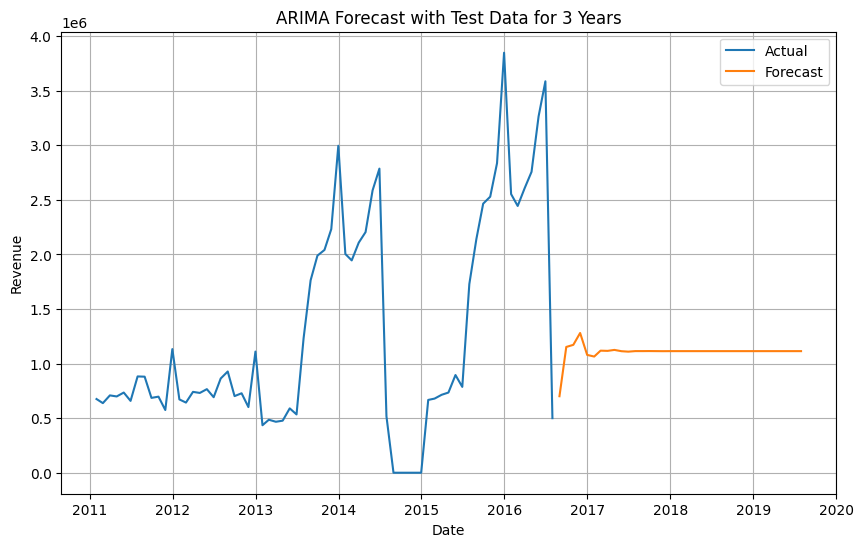

In [16]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Aggregate the data if needed (e.g., if you want to forecast monthly)
# Here we'll sum the data by month
monthly_data = data.resample('M').sum()

# Fit ARIMA model
model = ARIMA(monthly_data['Revenue'], order=(5,1,0))  # Example order, you may need to tune this
arima_model = model.fit()

# Forecast for 3 years (36 months)
forecast = arima_model.forecast(steps=36)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Revenue'], label='Actual')
plt.plot(pd.date_range(start=monthly_data.index[-1], periods=37, freq='M')[1:], forecast, label='Forecast')
plt.title('ARIMA Forecast with Test Data for 3 Years')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()
